In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set_style('whitegrid')

In [3]:
with open('MachineLearningRating_v3.txt', 'r') as f:
    header_line = f.readline()
column_names = [name.strip() for name in header_line.strip().split('|')]

try:
    df = pd.read_csv(
        'MachineLearningRating_v3.txt',
        sep='|',
        skiprows=1,
        names=column_names,
        low_memory=False
    )
    print("File loaded successfully using the robust method!")
except FileNotFoundError:
    print("Error: Make sure 'MachineLearningRating_v3.txt' is in the right directory.")
    df = None

if df is not None:
    print("\n--- First 5 Rows (Correctly Loaded) ---")
    print(df.head())

    print("\n--- Data Structure & Dtypes ---")
    df.info()

    print("\n--- Descriptive Statistics (Numerical) ---")
    print(df.describe())

    print("\n--- Descriptive Statistics (Categorical) ---")
    print(df.describe(include=['object']))

File loaded successfully using the robust method!

--- First 5 Rows (Correctly Loaded) ---
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  MaritalStat

In [4]:
# Data Cleaning & Type Conversion

print("--- Starting Data Type Conversion ---")

financial_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm']
for col in financial_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = ['RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')


print("\n--- Replacing placeholder strings with NaN ---")
df = df.replace(['Not specified', '  ', ' '], np.nan)

print("\n--- Data Info After Cleaning ---")
df.info()

print("\n--- Missing Values After Cleaning ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'count': missing_values, 'percentage': missing_percentage})
print(missing_df[missing_df['count'] > 0].sort_values(by='percentage', ascending=False))

--- Starting Data Type Conversion ---

--- Replacing placeholder strings with NaN ---

--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               104888 non-null   object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        

In [5]:
# Strategic Handling of Missing Data

print("--- Handling Missing Data ---")

cols_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder', 'MaritalStatus', 'Gender', 'Citizenship']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')


median_value = df['CustomValueEstimate'].median()
df['CustomValueEstimate'].fillna(median_value, inplace=True)
print(f"Filled missing 'CustomValueEstimate' with median: {median_value:.2f}")


categorical_cols_to_fill = ['NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'Bank', 'AccountType', 'make', 'Model']
for col in categorical_cols_to_fill:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)


df.dropna(inplace=True)

# --- Final Check ---
print("\n--- Data Shape and Info After Handling Missing Values ---")
print(f"New DataFrame shape: {df.shape}")
df.info()

--- Handling Missing Data ---
Dropped columns: ['NumberOfVehiclesInFleet', 'CrossBorder', 'MaritalStatus', 'Gender', 'Citizenship']


C:\Users\HP\AppData\Local\Temp\ipykernel_15596\3339987423.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomValueEstimate'].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15596\3339987423.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Filled missing 'CustomValueEstimate' with median: 220000.00

--- Data Shape and Info After Handling Missing Values ---
New DataFrame shape: (999224, 47)
<class 'pandas.core.frame.DataFrame'>
Index: 999224 entries, 0 to 1000097
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       999224 non-null  int64         
 1   PolicyID                  999224 non-null  int64         
 2   TransactionMonth          999224 non-null  datetime64[ns]
 3   IsVATRegistered           999224 non-null  bool          
 4   LegalType                 999224 non-null  object        
 5   Title                     999224 non-null  object        
 6   Language                  999224 non-null  object        
 7   Bank                      999224 non-null  object        
 8   AccountType               999224 non-null  object        
 9   Country                   999224 non-null 

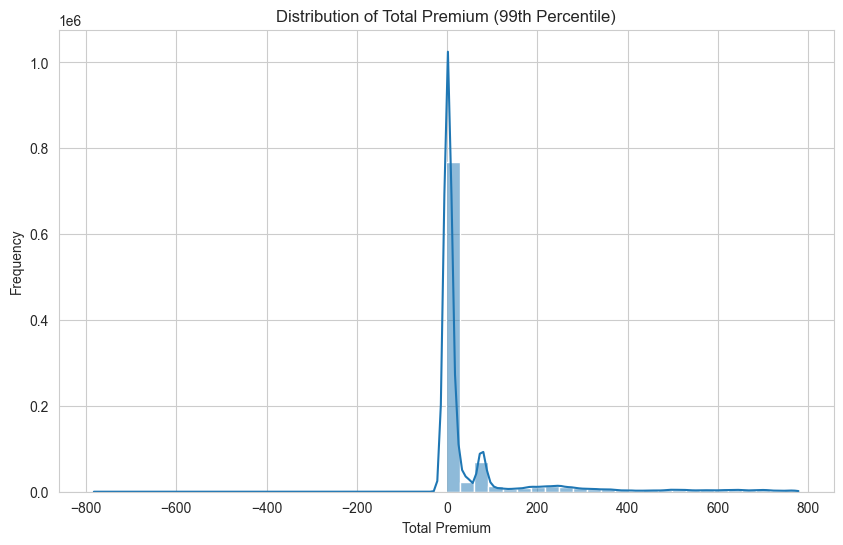

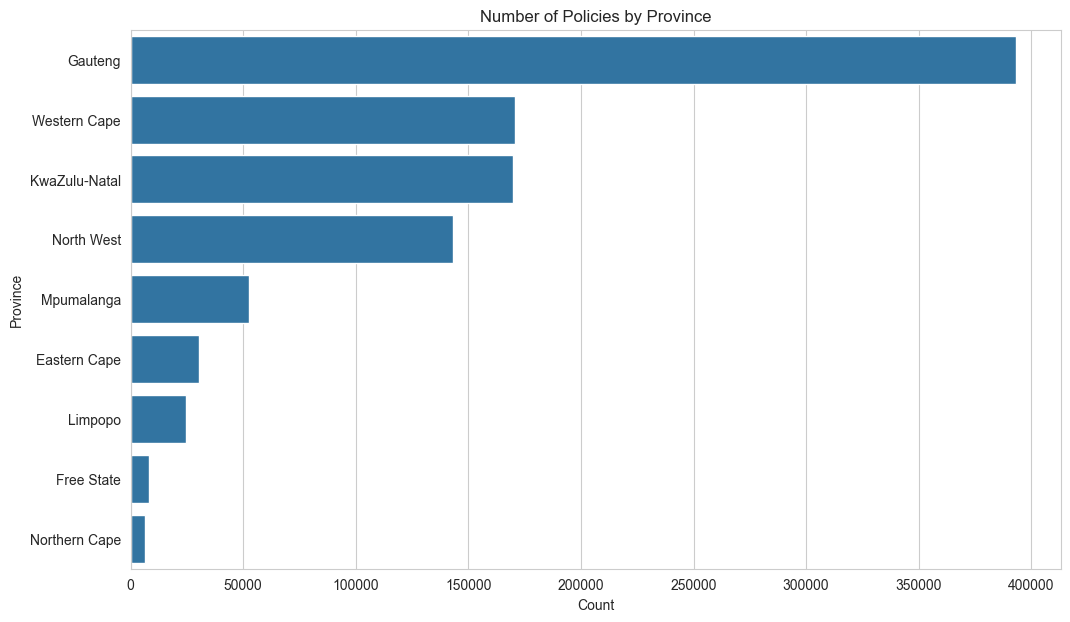

In [6]:
# Distribution of a key numerical variable: TotalPremium
plt.figure(figsize=(10, 6))
sns.histplot(df[df['TotalPremium'] < df['TotalPremium'].quantile(0.99)]['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of Total Premium (99th Percentile)')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(y=df['Province'], order=df['Province'].value_counts().index)
plt.title('Number of Policies by Province')
plt.xlabel('Count')
plt.ylabel('Province')
plt.show()

--- Average Loss Ratio by Province (Mean) ---
Province
Gauteng          0.429480
Mpumalanga       0.392996
Limpopo          0.348712
Western Cape     0.339419
North West       0.285348
KwaZulu-Natal    0.265328
Eastern Cape     0.235636
Northern Cape    0.203831
Free State       0.106209
Name: LossRatio, dtype: float64


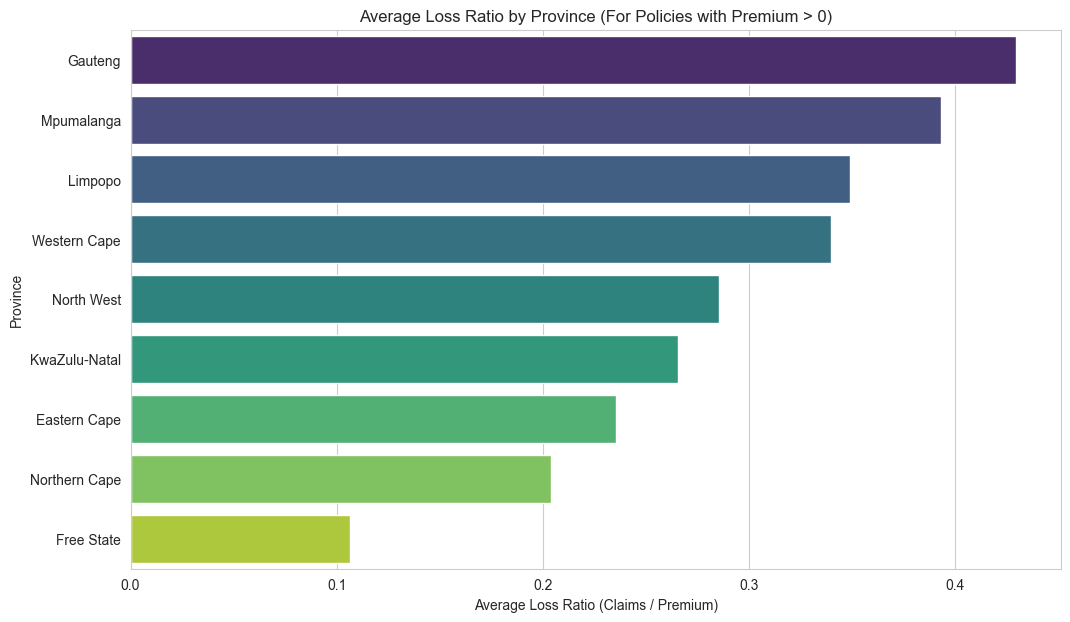

In [7]:
#  Corrected Bivariate Analysis 

df_profitable = df.query('TotalPremium > 0').copy()

df_profitable['LossRatio'] = df_profitable['TotalClaims'] / df_profitable['TotalPremium']

lr_by_province_mean = df_profitable.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)

print("--- Average Loss Ratio by Province (Mean) ---")
print(lr_by_province_mean)

plt.figure(figsize=(12, 7))
sns.barplot(x=lr_by_province_mean.values, y=lr_by_province_mean.index, hue=lr_by_province_mean.index, palette='viridis', legend=False)
plt.title('Average Loss Ratio by Province (For Policies with Premium > 0)')
plt.xlabel('Average Loss Ratio (Claims / Premium)')
plt.ylabel('Province')
plt.show()

In [8]:
import os


output_dir = 'data'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' was created.")
else:
    print(f"Directory '{output_dir}' already exists.")

output_file_path = os.path.join(output_dir, 'cleaned_insurance_data.csv')
df_profitable.to_csv(output_file_path, index=False)

print(f"Cleaned data saved successfully to '{output_file_path}'")

Directory 'data' was created.
Cleaned data saved successfully to 'data\cleaned_insurance_data.csv'
